In [1]:
%load_ext autoreload
%autoreload 2

# Does weighting the Loss Help?

In [5]:
import autorootcwd
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testing Alphas

In [3]:
DIR = './results/weight_alpha_search'
files = os.listdir(DIR)
rows = []
for f in files:
    alpha = f.split('_')[1]
    with open(f"{DIR}/{f}/val_metrics.json") as f:
        data = json.load(f)
        rows.append({
            'alpha': alpha,
            'accuracy': data['mean']['acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'mean_acc_class': data['class_wise']['acc']['mean'],
            'median_acc_class': data['class_wise']['acc']['median'],
            'avg_transitions': data['avg_transitions_per_song']
        })
 

df = pd.DataFrame(rows)
# Round this clumn to 2 decimal places
# df['alpha'] = df['alpha'].astype(float)
# df['accuracy'] = df['accuracy'].round(2)
df.sort_values('alpha', ascending=True, inplace=True)

In [4]:
df

,alpha,accuracy,root,majmin,third,seventh,mirex,mean_acc_class,median_acc_class,avg_transitions
6,0,59.997804,78.074613,75.757682,75.025326,62.257793,79.132400,19.094157,0.000000,99.611570
4,0.1,59.975243,77.832714,75.557592,74.876843,62.175839,79.337285,20.580541,3.409628,100.334711
9,0.2,60.371415,78.905591,76.444543,75.812278,62.501761,78.572185,22.748008,7.585539,104.115702
8,0.3,60.312525,79.022942,76.619768,76.065891,62.378618,78.531504,23.708879,9.528198,106.933884
7,0.4,59.549772,79.118289,76.473135,76.068110,61.539467,78.047260,25.070738,15.144164,111.528926
10,0.5,58.342283,78.810621,75.669500,75.525016,60.177514,77.614974,27.328276,20.641201,116.756198
3,0.6,56.851045,78.499253,74.979917,75.151201,58.580480,76.907399,28.726471,25.916826,120.913223
0,0.7,54.253750,77.889590,73.627112,74.287947,55.909069,75.975568,29.173881,29.373962,125.363636
2,0.8,53.399109,77.190361,73.082264,73.983694,55.017726,76.063045,29.574568,32.081181,126.747934
1,0.9,49.519021,76.513912,71.221607,72.966059,50.839740,74.563541,31.732657,35.500475,135.743802


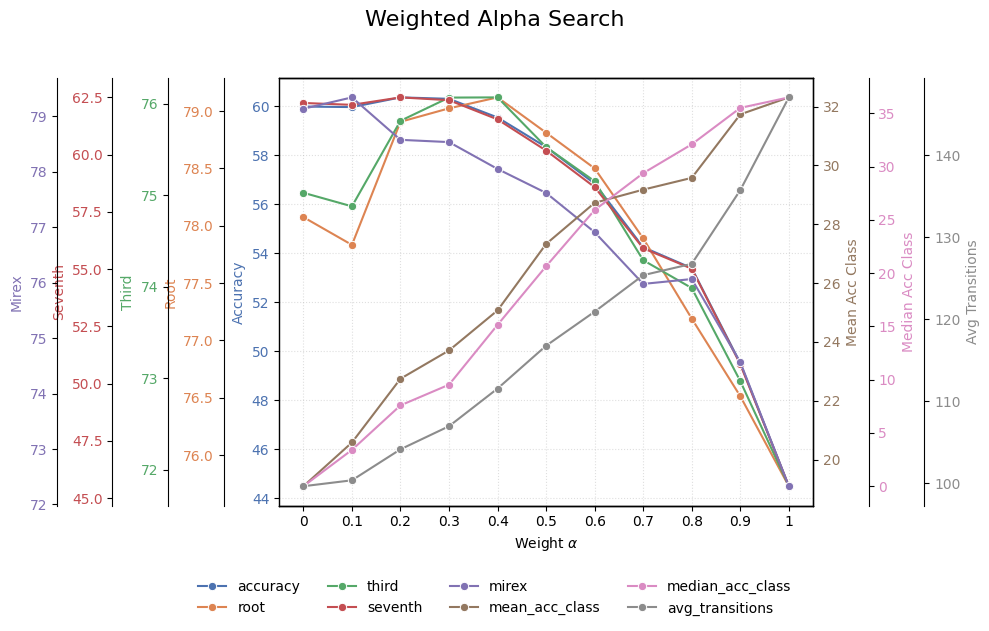

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn color palette
palette = sns.color_palette('deep', 8)
labels = ['accuracy', 'root', 'third', 'seventh', 'mirex', 'mean_acc_class', 'median_acc_class', 'avg_transitions']
colors = dict(zip(labels, palette))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel(r'Weight $\alpha$')
ax1.set_ylabel('Accuracy', color=colors['accuracy'])
ax1.tick_params(axis='y', labelcolor=colors['accuracy'])
ax1.grid(True, linestyle=':', alpha=0.4)

# Base axis: accuracy
ax1.plot(df['alpha'], df['accuracy'], color=colors['accuracy'],
         marker='o', markersize=6,
         markerfacecolor=colors['accuracy'], markeredgecolor='white', markeredgewidth=0.7,
         label='accuracy')

# Helper for plotting on twin axes
def plot_on_twin(base_ax, offset, label, side='left'):
    twin = base_ax.twinx()
    twin.plot(df['alpha'], df[label],
              color=colors[label],
              marker='o', markersize=6,
              markerfacecolor=colors[label], markeredgecolor='white', markeredgewidth=0.7,
              label=label)
    twin.tick_params(axis='y', labelcolor=colors[label])
    spine = 'left' if side == 'left' else 'right'
    twin.yaxis.set_label_position(spine)
    twin.yaxis.tick_left() if side == 'left' else twin.yaxis.tick_right()
    twin.spines[spine].set_position(('outward', offset))
    twin.set_ylabel(label.replace('_', ' ').title(), color=colors[label])
    return twin

# Left-side metrics
plot_on_twin(ax1, 40, 'root', 'left')
plot_on_twin(ax1, 80, 'third', 'left')
plot_on_twin(ax1, 120, 'seventh', 'left')
plot_on_twin(ax1, 160, 'mirex', 'left')

# Right-side metrics
plot_on_twin(ax1, 0, 'mean_acc_class', 'right')
plot_on_twin(ax1, 40, 'median_acc_class', 'right')
plot_on_twin(ax1, 80, 'avg_transitions', 'right')

# Legend
fig.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)

fig.suptitle('Weighted Alpha Search', fontsize=16)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.savefig('./thesis/figures/weight_alpha_search_full.png', dpi=300, bbox_inches='tight')
plt.show()


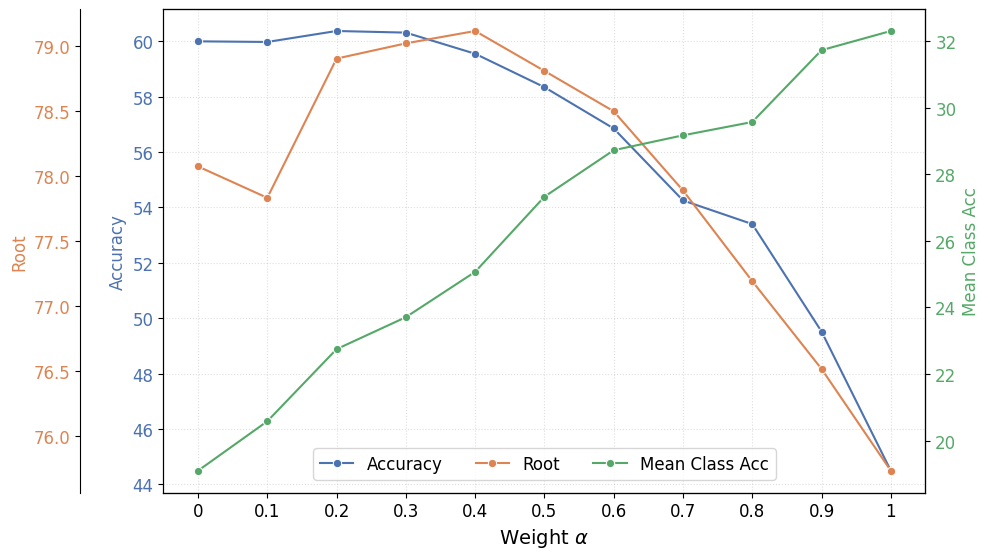

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn color palette for 3 lines
palette = sns.color_palette('deep', 3)
labels = ['accuracy', 'root', 'mean_acc_class']
colors = dict(zip(labels, palette))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Base axis: accuracy
ax1.set_xlabel(r'Weight $\alpha$', fontsize=14)
ax1.set_ylabel('Accuracy', color=colors['accuracy'], fontsize=12)
ax1.tick_params(axis='x', labelsize=12)  # Just fontsize
ax1.tick_params(axis='y', labelsize=12, labelcolor=colors['accuracy'])  # Fontsize + color
ax1.grid(True, linestyle=':', alpha=0.4)

ax1.plot(df['alpha'], df['accuracy'],
         color=colors['accuracy'],
         marker='o', markersize=6,
         markerfacecolor=colors['accuracy'],
         markeredgecolor='white', markeredgewidth=0.7,
         label='Accuracy')

# Twin left: root
ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 60))
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax2.set_ylabel('Root', color=colors['root'], fontsize=12)
ax2.tick_params(axis='y', labelsize=12, labelcolor=colors['root'])
ax2.plot(df['alpha'], df['root'],
         color=colors['root'],
         marker='o', markersize=6,
         markerfacecolor=colors['root'],
         markeredgecolor='white', markeredgewidth=0.7,
         label='Root')

# Twin right: mean class accuracy
ax3 = ax1.twinx()
ax3.set_ylabel('Mean Class Acc', color=colors['mean_acc_class'], fontsize=12)
ax3.tick_params(axis='y', labelsize=12, labelcolor=colors['mean_acc_class'])
ax3.plot(df['alpha'], df['mean_acc_class'],
         color=colors['mean_acc_class'],
         marker='o', markersize=6,
         markerfacecolor=colors['mean_acc_class'],
         markeredgecolor='white', markeredgewidth=0.8,
         label='Mean Class Acc')

# Collect handles and labels from all axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine them
all_handles = handles1 + handles2 + handles3
all_labels = labels1 + labels2 + labels3

# Add combined legend to ax1
ax1.legend(all_handles, all_labels,
           loc='lower center',
           bbox_to_anchor=(0.5, 0.01),
           ncol=3,
           fontsize=12,
           frameon=True)

fig.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at the bottom for the legend
plt.savefig('./thesis/figures/weight_alpha_search_trim.png', dpi=300, bbox_inches='tight')
plt.show()


# Weights

In [6]:

from src.data.dataset import FullChordDataset
from src.utils import get_split_filenames, id_to_chord, NUM_CHORDS, get_synthetic_filenames

In [8]:
train, _, _ = get_split_filenames()

ds = FullChordDataset(train, dev_mode=True, use_augs=True)

weights = ds.get_class_weights()

/Users/pierrelardet/.pyenv/versions/UG4Diss/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


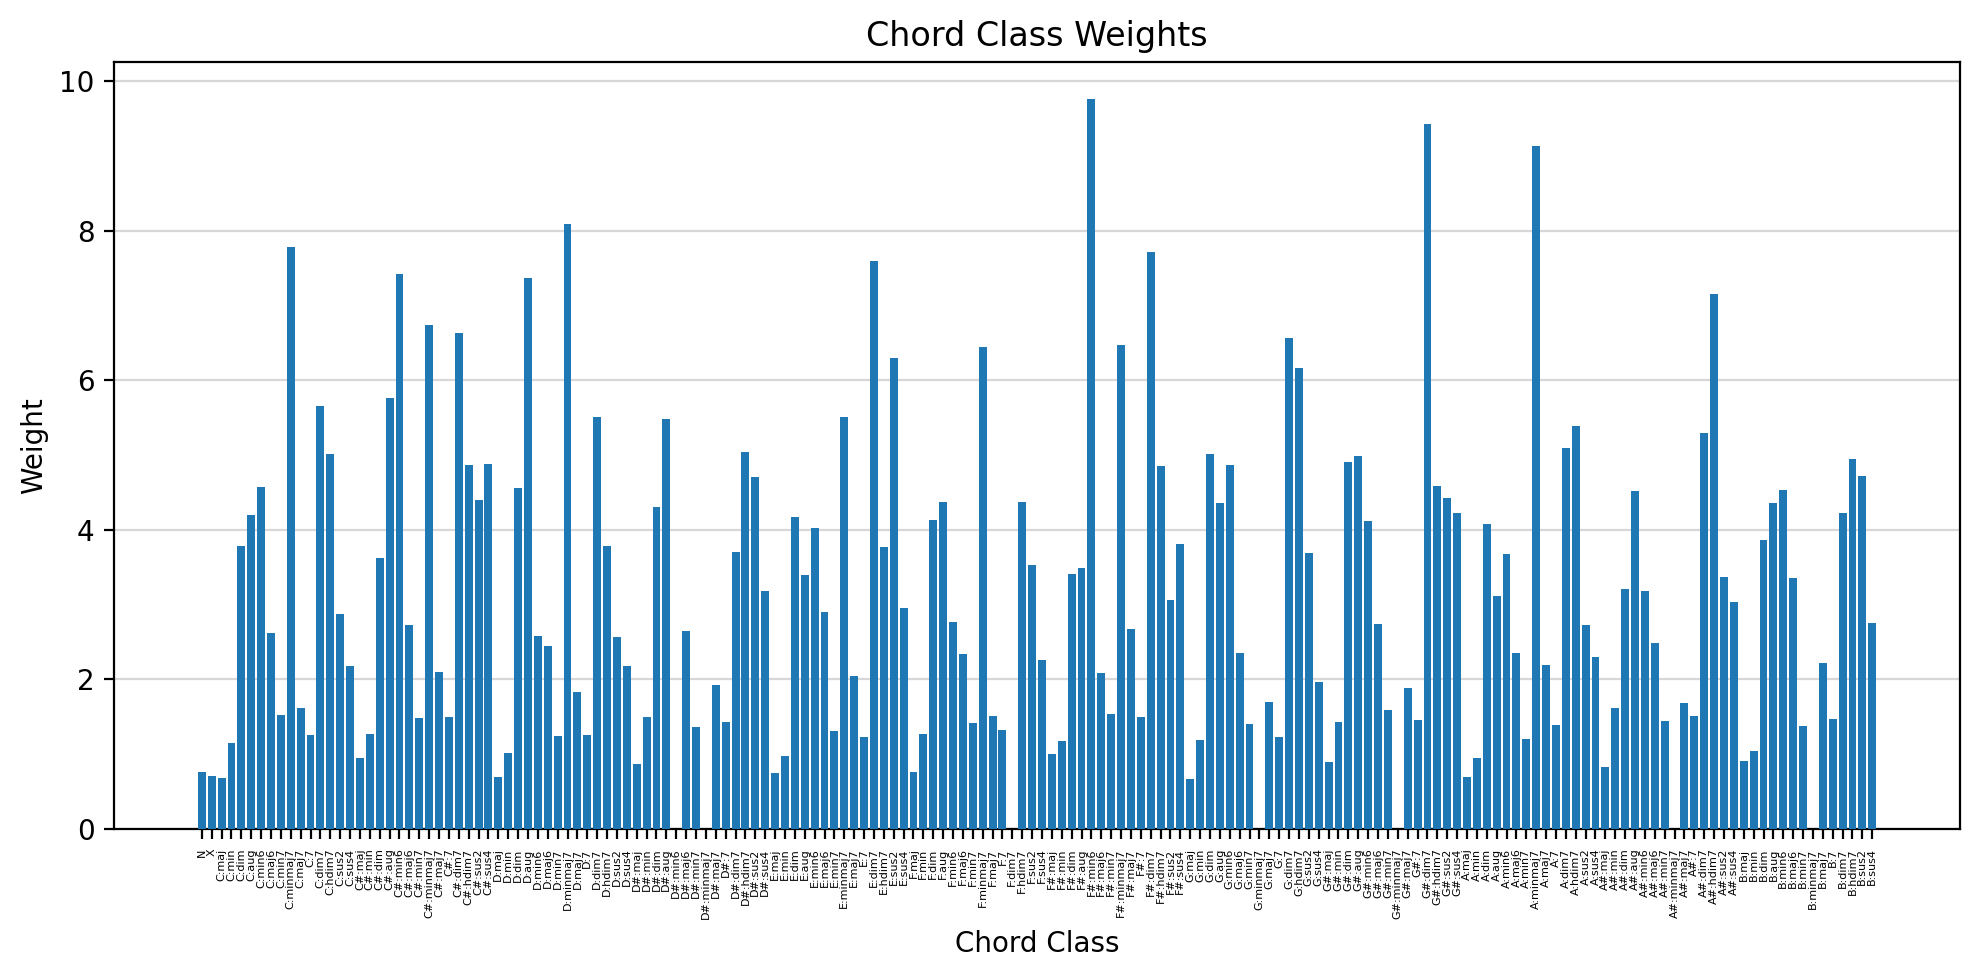

In [7]:
# Weights hist
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(weights)), weights, zorder=3, color='tab:blue')
plt.xlabel('Chord Class')
plt.ylabel('Weight')
plt.title('Chord Class Weights')
plt.xticks(range(len(weights)), [id_to_chord(c) for c in range(NUM_CHORDS)] , rotation=90, fontsize=4)
plt.tight_layout()
# plt.savefig('./thesis/figures/class_weights.png', bbox_inches='tight')
plt.show()

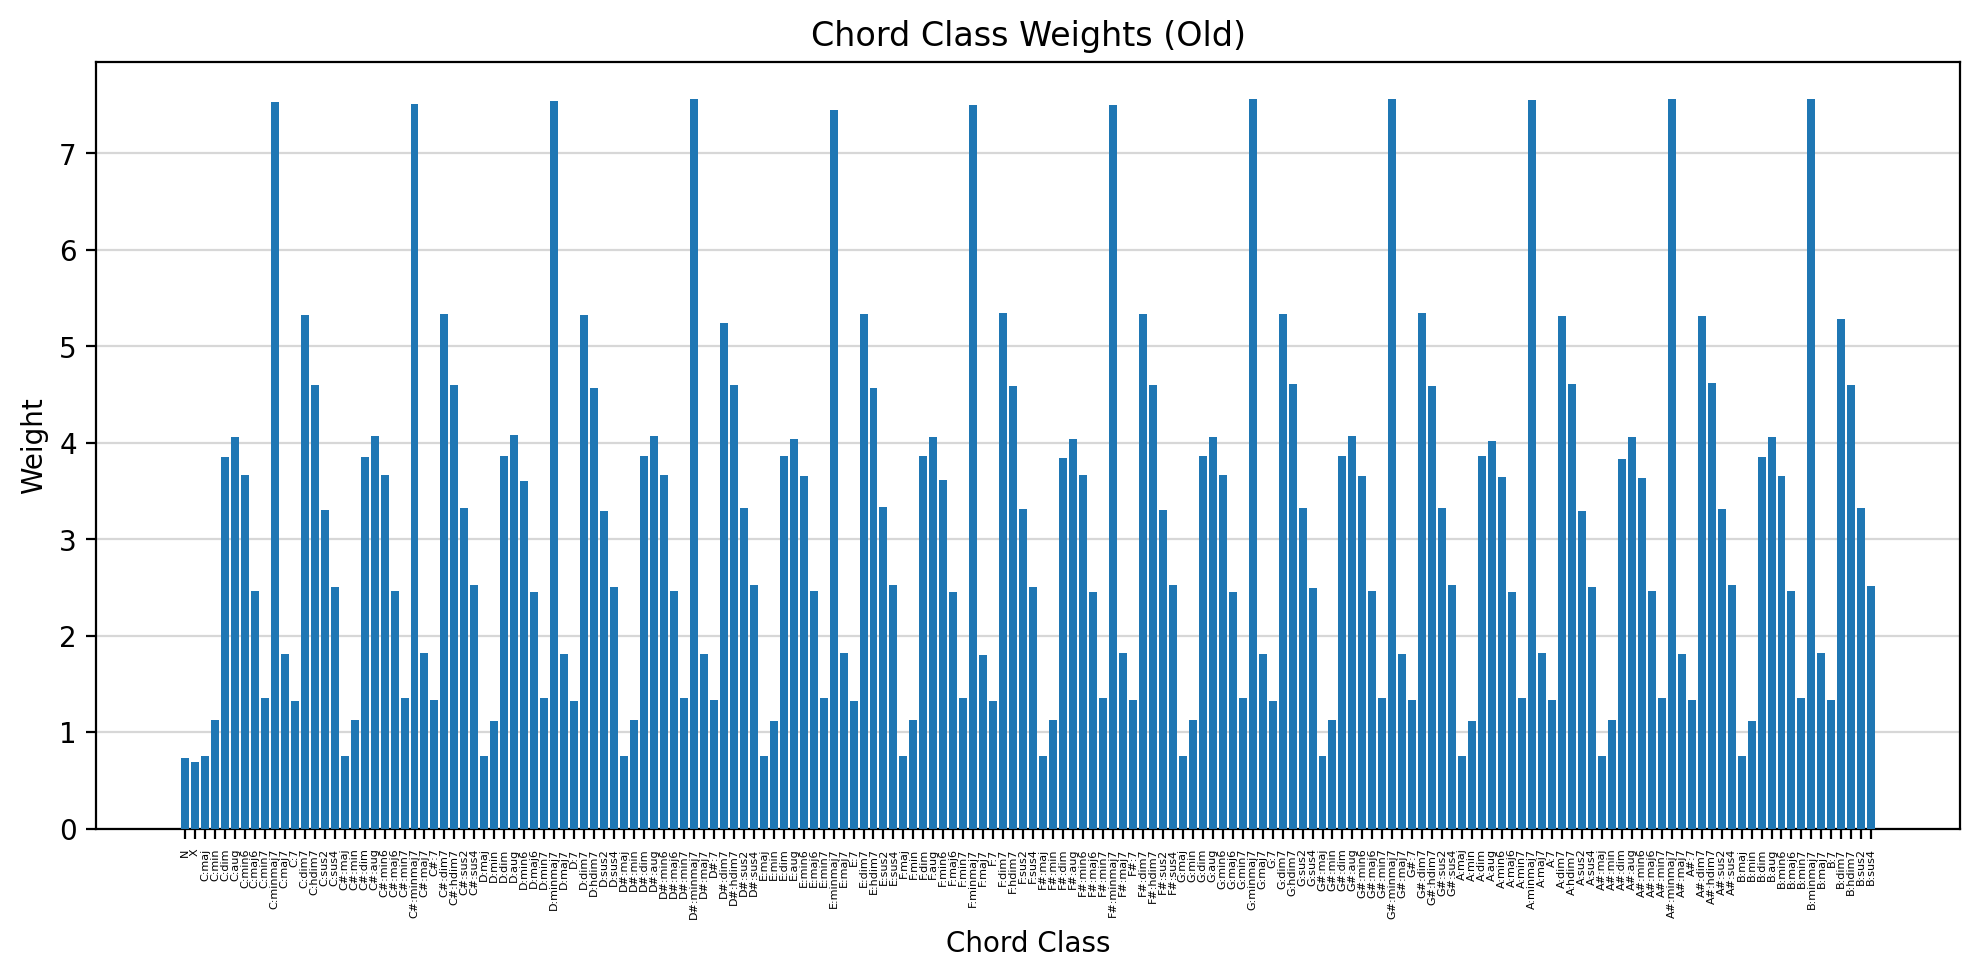

In [8]:
weights_shifted = ds.get_class_weights(aug_shift_prob=0.9)
# Weights hist
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(weights_shifted)), weights_shifted, zorder=3, color='tab:blue')
plt.xlabel('Chord Class')
plt.ylabel('Weight')
plt.title('Chord Class Weights (Old)')
plt.xticks(range(len(weights_shifted)), [id_to_chord(c) for c in range(NUM_CHORDS)] , rotation=90, fontsize=4)
plt.tight_layout()
# plt.savefig('./thesis/figures/class_weights_shifted_0.9.png', bbox_inches='tight')
plt.show()

In [10]:
synth = get_synthetic_filenames()
synth_ds = FullChordDataset(filenames=[], synthetic_filenames=synth, dev_mode=True)

In [10]:
counts = synth_ds.get_class_counts()

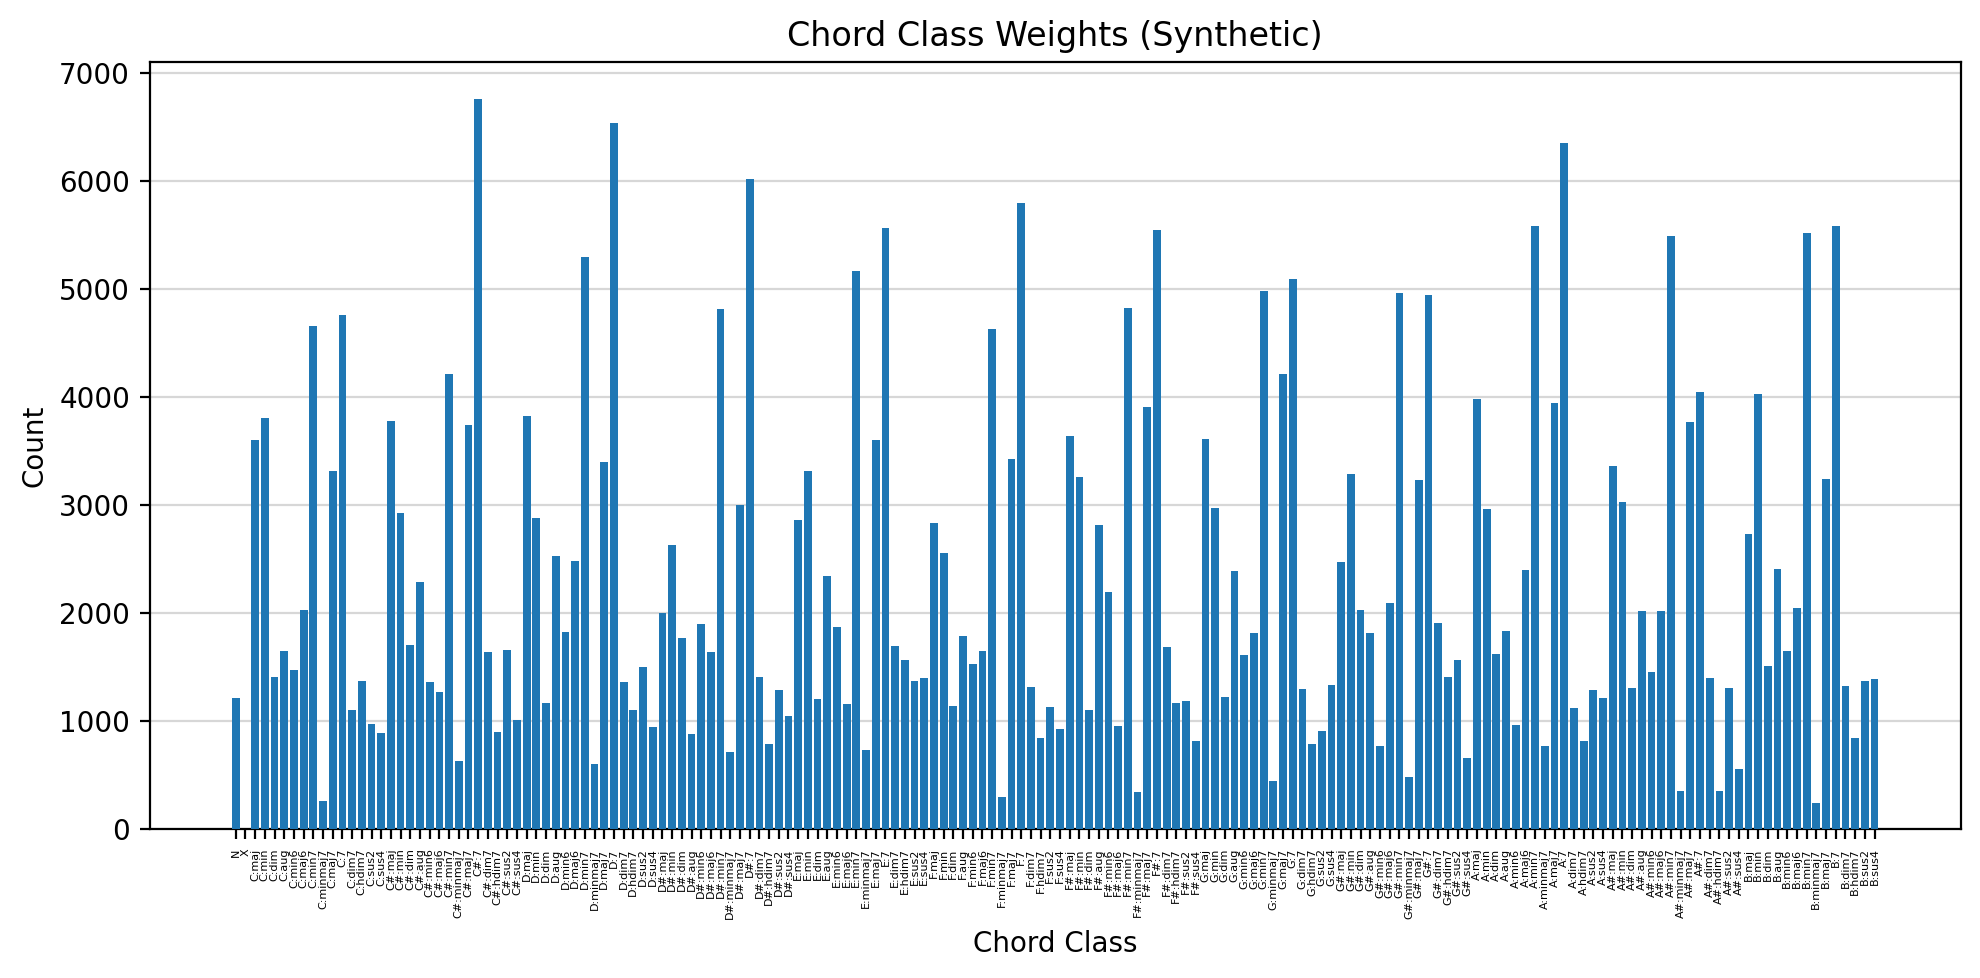

In [11]:
# Plot
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(counts)), counts, zorder=3, color='tab:blue')
plt.xlabel('Chord Class')
plt.ylabel('Count')
plt.title('Chord Class Weights (Synthetic)')
plt.xticks(range(len(counts)), [id_to_chord(c) for c in range(NUM_CHORDS)] , rotation=90, fontsize=4)
plt.tight_layout()
# plt.savefig('./thesis/figures/class_weights_synth.png', bbox_inches='tight')
plt.show()

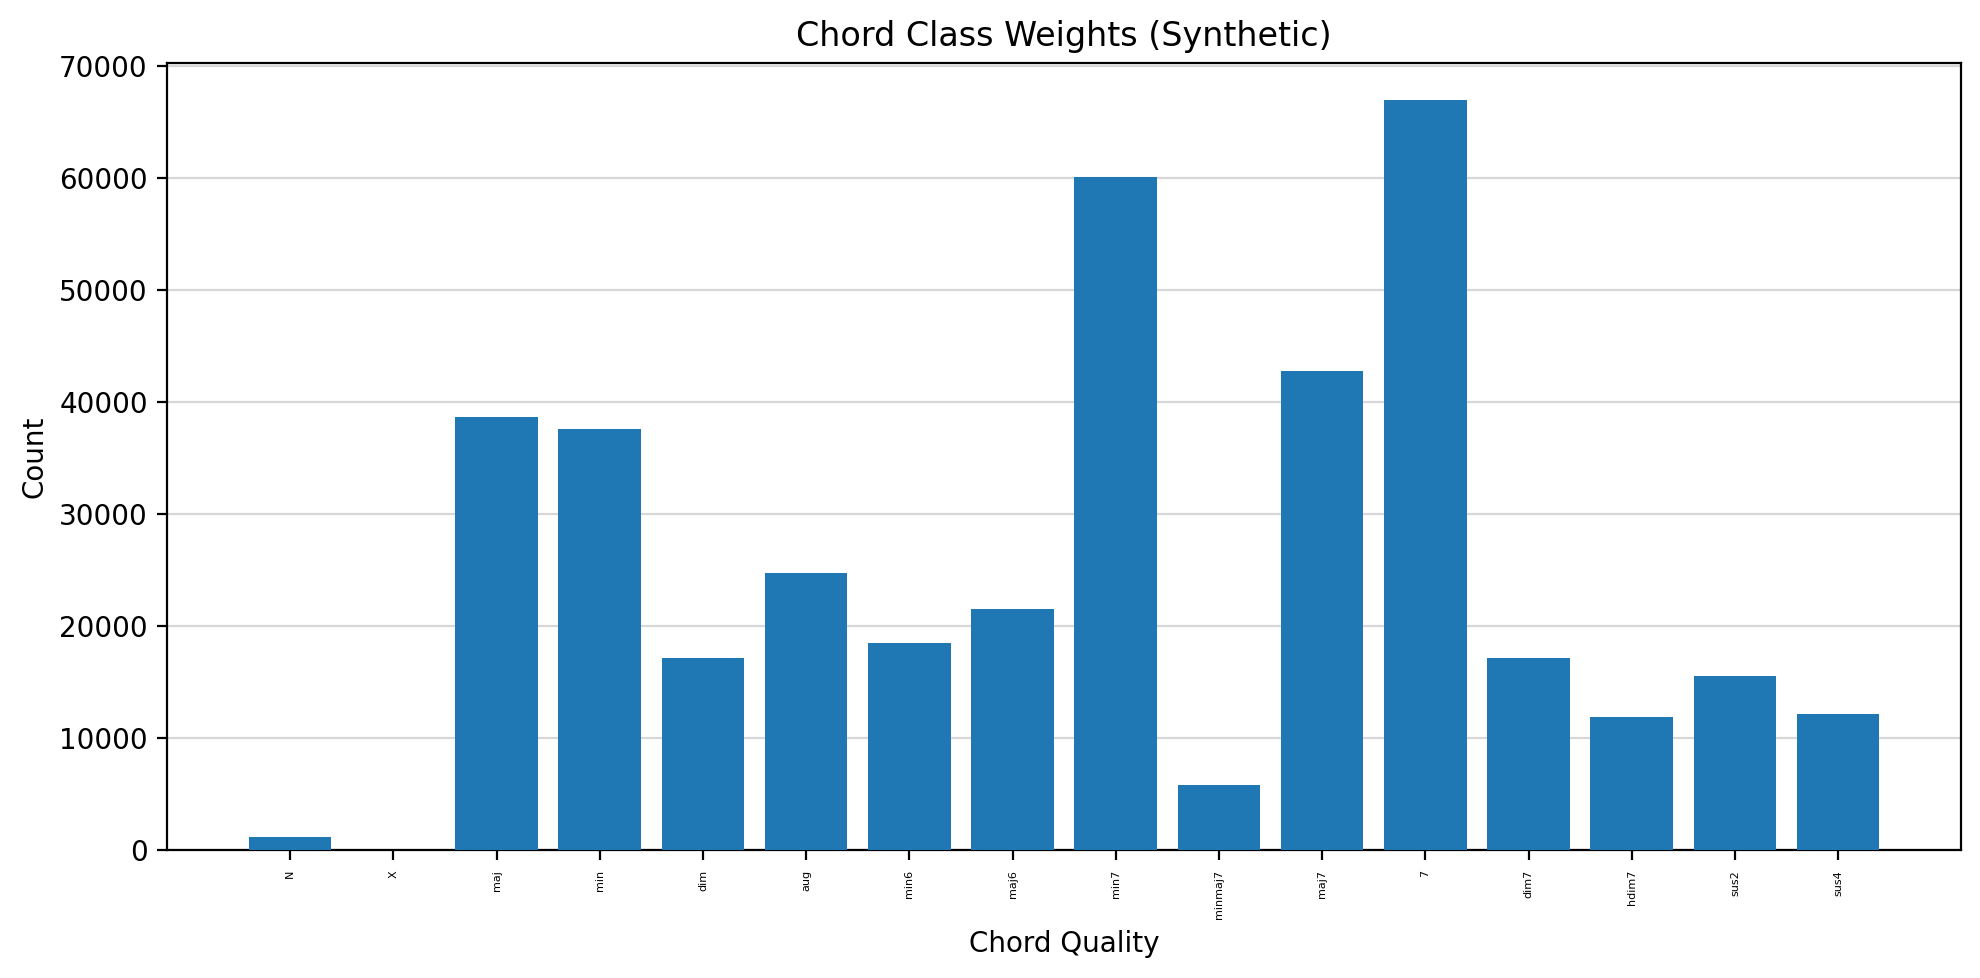

In [12]:
# Now counts by quality rather than class
from src.utils import get_chord_quality

quality_counts = {}
for i in range(len(counts)):
    quality = get_chord_quality(i)
    if quality not in quality_counts:
        quality_counts[quality] = 0
    quality_counts[quality] += counts[i]

# Plot
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(quality_counts)), quality_counts.values(), zorder=3, color='tab:blue')
plt.xlabel('Chord Quality')
plt.ylabel('Count')
plt.title('Chord Class Weights (Synthetic)')
plt.xticks(range(len(quality_counts)), quality_counts.keys() , rotation=90, fontsize=4)
plt.tight_layout()
# plt.savefig('./thesis/figures/class_weights_synth_quality.png', bbox_inches='tight')
plt.show()


In [11]:
from src.data.dataset import get_calibrated_priors, FullChordDataset

train_ds = FullChordDataset(train, dev_mode=True, use_augs=True, synthetic_filenames=synth)
target_ds = FullChordDataset(train, dev_mode=True, use_augs=False)

calibrated_priors = get_calibrated_priors(train_ds, target_ds, return_as_log=False)

In [18]:
from src.utils import get_chord_quality

# Average over qualities
quality_priors = {}
for i in range(len(calibrated_priors)):
    quality = get_chord_quality(i)
    if quality not in quality_priors:
        quality_priors[quality] = 0
    quality_priors[quality] += calibrated_priors[i]
# Normalize
for k in quality_priors.keys():
    quality_priors[k] /= len([i for i in range(len(calibrated_priors)) if get_chord_quality(i) == k])


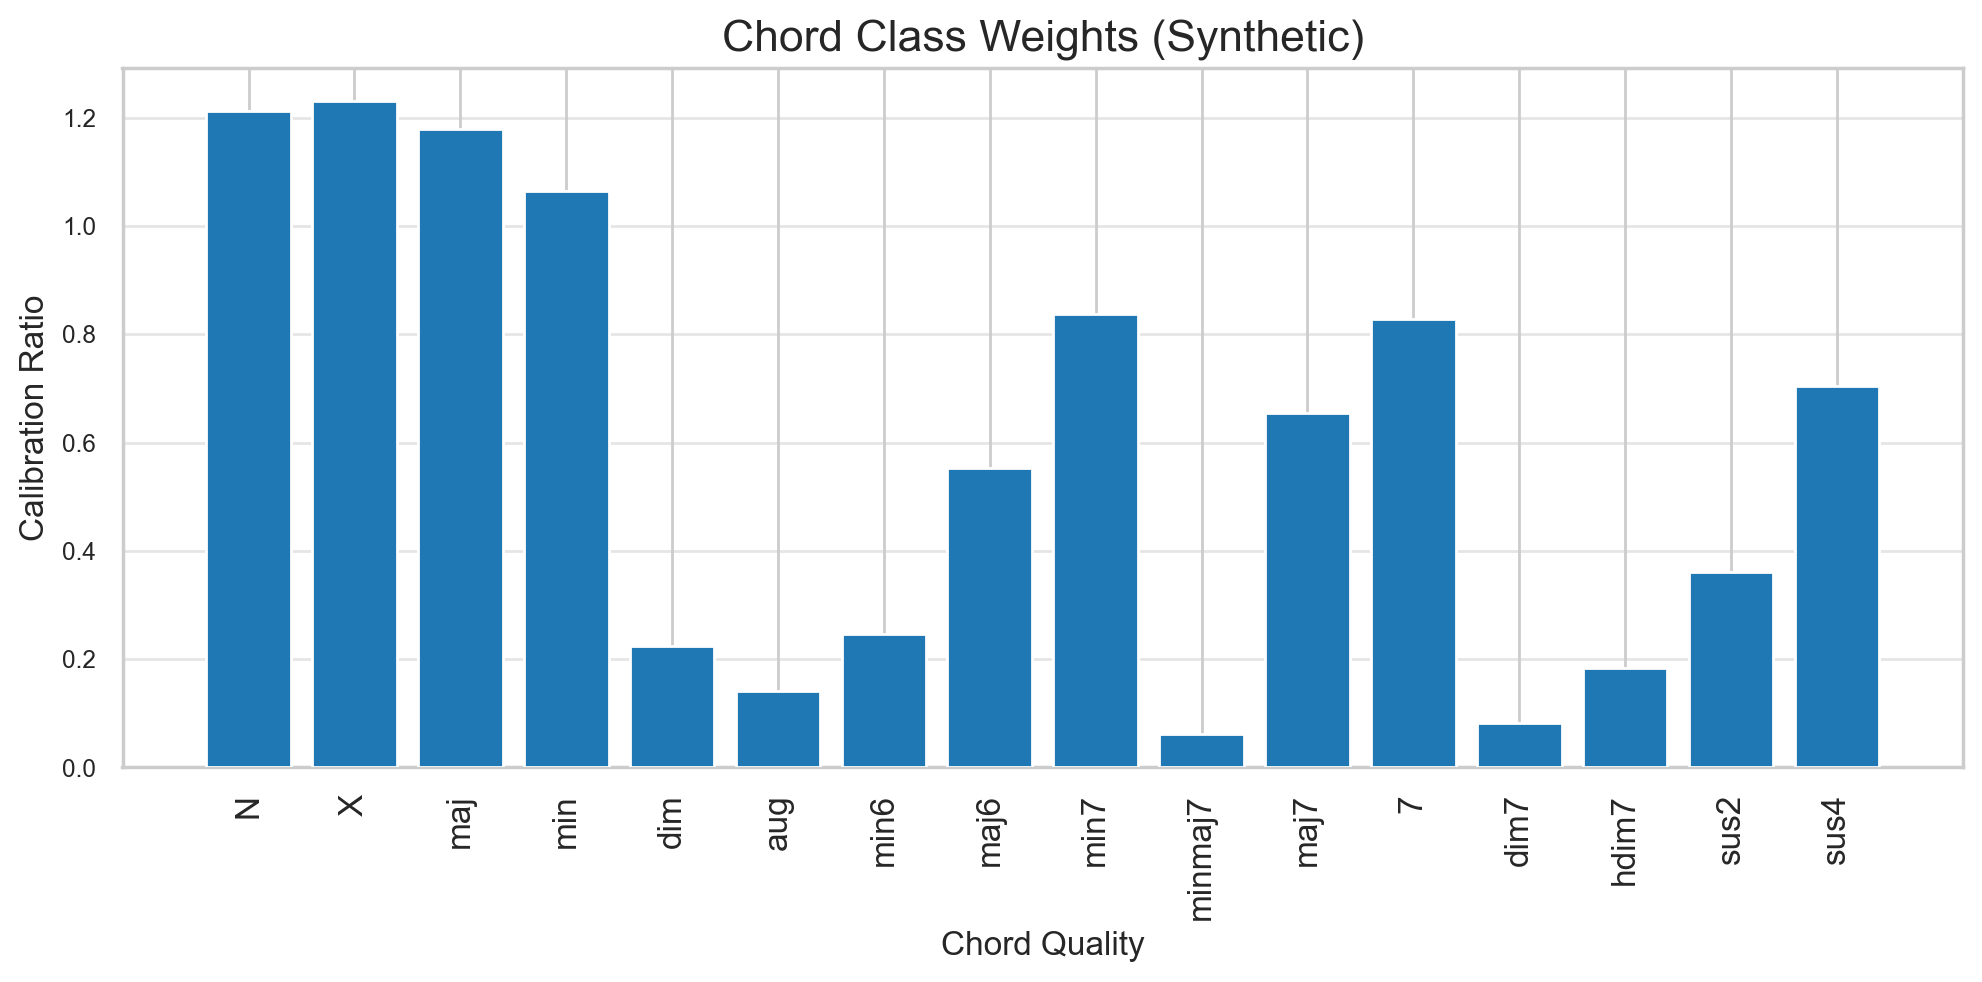

In [27]:
# Plot
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(quality_priors)), quality_priors.values(), zorder=3, color='tab:blue')
plt.xlabel('Chord Quality', fontsize=12)
plt.ylabel('Calibration Ratio', fontsize=12)
plt.title('Chord Class Weights (Synthetic)', fontsize=16)
plt.xticks(range(len(quality_priors)), quality_priors.keys() , rotation=90, fontsize=12)
plt.tight_layout()
plt.savefig('./thesis/figures/calibration_ratios.png', dpi=200, bbox_inches='tight')
plt.show()